Cleaning and Filtering the Master Data File

In [136]:
# Import libraries:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
# Graph output styling from matplotlib:
plt.style.use('fivethirtyeight')

In [137]:
# Global variables:
repo_dir = os.getcwd()  # Directory of the notebook
source_data_dir = os.path.join(repo_dir, 'fbref-dw-merges')

# League ID and name mapping variables:
league_ids = ['ENG-Premier League', 'ESP-La Liga', 'FRA-Ligue 1', 'ITA-Serie A']
league_names = ['Premier League', 'La Liga', 'Ligue 1', 'Serie A']
league_names_dict = dict(zip(league_ids, league_names))

# Big teams list:
big_teams = ['Arsenal', 'Manchester City', 'Manchester Utd', 'Tottenham', 'Chelsea', 'Liverpool', 'Real Madrid', 'Barcelona', 'Atlético Madrid', 'Paris S-G', 'Juventus', 'Milan', 'Inter']

# Playing time duplicate columns (to be removed from the master file):
playing_time_duplicates = ['Min.1', 'Mn/MP', 'Min%', '90s', 'Starts.1', 'Mn/Start', 'Compl', 'Subs', 'Mn/Sub', 'unSub']

In [162]:
# Function that writes the output data to a CSV file:
def make_csv(dir, df, file_name):
    file_path = os.path.join(dir, f'{file_name}.csv')
    return df.to_csv(file_path)


# Function that removes unnamed columns:
def remove_unnamed_cols(df):

    # Create list of unnamed columns:
    columns = df.columns
    unnamed_cols = [col for col in columns if "Unnamed" in col]

    # Create a new df:
    new_df = (df
              .drop(columns=unnamed_cols)
              )

    return new_df


# Function that removes unnecessary DW player/team ID columns:
def remove_dw_info(df):
    return (df.drop(columns=['team_id', 'player_id', 'league_id']))


# Function that removes duplicate FBref playing time columns:
def remove_playing_time_cols(df):
    return (df.drop(columns=playing_time_duplicates))


# Function that slices the master file based on an optimal playing time cutoff:
def playing_time_slice(df, cutoff : int = 8):
    return (df[df['90s_r'] >= cutoff]
            .reset_index()
            .drop(columns='index')
            )


# Function that adds the log(market value) column to the data:
def add_log_mkt_val_col(df):
    df['log_mkt_val'] = np.log(df['market_value_in_eur'])
    return df


# Function that adds the "Big Team" dummy variable to the data:
def add_big_team_col(df):
    df['Big Team'] = df['team'].isin(big_teams).astype(int)
    return df


# Function that adds a clean league name column based on league id:
def add_league_name_col(df):
    df['league_name'] = df['league'].map(league_names_dict)
    return df

In [153]:
# Import the master file and make a copy:
master_df = pd.read_csv(os.path.join(source_data_dir, 'master_file.csv'))
master_df_copy = master_df.copy(deep=True)
master_df_copy

,Unnamed: 0.1,Unnamed: 0,league,season,team,player_name,nationality,position,age,YOB,MP,Starts,Min,90s_r,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Gls.2,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK.1,PKatt.1,xG.2,npxG.2,npxG/Sh,G-xG,np:G-xG,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,Att.1,Cmp%.1,Cmp.2,Att.2,Cmp%.2,Cmp.3,Att.3,Cmp%.3,Unnamed: 78,Unnamed: 79,xA,A-xAG,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Live,Dead,FK.1,TB,Sw,Crs,TI,CK,In,Out,Str,Cmp.4,Off,Blocks,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,SCA,SCA90,PassLive,PassDead,TO,Sh.1,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,TO.1,Sh.2,Fld.1,Def.1,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att.4,Tkl%,Lost,Blocks.1,Sh.3,Pass,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Touches,Def Pen,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Att Pen,Live.1,Att.5,Succ,Succ%,Tkld,Tkld%,Carries,TotDist.1,PrgDist.1,PrgC.1,1/3,CPA,Mis,Dis,Rec,PrgR.1,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,MP.1,Min.1,Mn/MP,Min%,90s,Starts.1,Mn/Start,Compl,Subs,Mn/Sub,unSub,PPM,onG,onGA,+/-,+/-90,On-Off,onxG,onxGA,xG+/-,xG+/-90,On-Off.1,team_id,player_id,league_id,market_value_in_eur
0,0,0,ENG-Premier League,1718,Arsenal,Alex Oxlade-Chamberlain,ENG,DF,23.0,1993.0,3.0,3.0,241.0,2.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.3,0.5,0.8,19.0,16.0,21.0,0.00,0.00,0.00,0.00,0.00,0.09,0.19,0.29,0.09,0.29,ENG,DF,23.0,1993.0,2.7,0.0,9.0,2.0,22.2,3.36,0.75,0.00,0.00,25.3,0.0,0.0,0.0,0.3,0.3,0.03,-0.3,-0.3,ENG,DF,23.0,1993.0,2.7,124.0,158.0,78.5,2464.0,689.0,53.0,58.0,91.4,48.0,57.0,84.2,23.0,33.0,69.7,0.0,0.5,0.6,-0.5,5.0,12.0,8.0,3.0,16.0,ENG,DF,23.0,1993.0,2.7,158.0,136.0,20.0,3.0,0.0,3.0,16.0,17.0,0.0,0.0,0.0,0.0,124.0,2.0,5.0,ENG,DF,23.0,1993.0,2.7,13.0,4.85,9.0,1.0,1.0,1.0,0.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,ENG,DF,23.0,1993.0,2.7,5.0,3.0,2.0,2.0,1.0,2.0,3.0,66.7,1.0,5.0,2.0,3.0,6.0,11.0,8.0,0.0,ENG,DF,23.0,1993.0,2.7,203.0,8.0,43.0,85.0,85.0,4.0,203.0,21.0,17.0,81.0,4.0,19.0,125.0,1178.0,667.0,19.0,18.0,5.0,5.0,4.0,125.0,21.0,ENG,DF,23.0,1993.0,3,241.0,80.0,7.0,2.7,3,NaN,2.0,0,NaN,0,1.00,4.0,7.0,-3.0,-1.12,-1.86,4.2,4.6,-0.4,-0.14,-0.74,31,143424,GB1,3.500000e+07
1,1,1,ENG-Premier League,1718,Liverpool,Alex Oxlade-Chamberlain,ENG,"MF,FW",23.0,1993.0,32.0,14.0,1493.0,16.6,3.0,7.0,10.0,3.0,0.0,0.0,3.0,0.0,2.2,2.2,3.8,5.9,76.0,120.0,122.0,0.18,0.42,0.60,0.18,0.60,0.13,0.23,0.36,0.13,0.36,ENG,"MF,FW",23.0,1993.0,16.6,3.0,38.0,15.0,39.5,2.29,0.90,0.08,0.20,21.1,0.0,0.0,0.0,2.2,2.2,0.06,0.8,0.8,ENG,"MF,FW",23.0,1993.0,16.6,609.0,796.0,76.5,11074.0,3186.0,262.0,305.0,85.9,244.0,312.0,78.2,79.0,135.0,58.5,7.0,3.8,3.2,3.2,34.0,70.0,40.0,7.0,120.0,ENG,"MF,FW",23.0,1993.0,16.6,796.0,740.0,51.0,10.0,13.0,11.0,70.0,8.0,32.0,20.0,11.0,0.0,609.0,5.0,12.0,ENG,"MF,FW",23.0,1993.0,16.6,74.0,4.46,54.0,6.0,9.0,1.0,1.0,3.0,15.0,0.90,9.0,0.0,4.0,1.0,0.0,1.0,ENG,"MF,FW",23.0,1993.0,16.6,32.0,21.0,13.0,14.0,5.0,6.0,21.0,28.6,15.0,24.0,0.0,24.0,20.0,52.0,14.0,0.0,ENG,"MF,FW",23.0,1993.0,16.6,989.0,13.0,92.0,482.0,433.0,46.0,989.0,54.0,40.0,74.1,13.0,24.1,563.0,4046.0,2194.0,76.0,54.0,16.0,37.0,24.0,679.0,122.0,ENG,"MF,FW",23.0,1993.0,32,1493.0,47.0,43.7,16.6,14,NaN,5.0,18,NaN,0,2.00,42.0,20.0,22.0,1.33,0.21,30.7,14.9,15.8,0.95,-0.14,31,143424,GB1,3.500000e+07
2,2,2,ENG-Premier League,1718,Arsenal,Granit Xhaka,SUI,MF,24.0,1992.0,38.0,37.0,3260.0,36.2,1.0,7.0,8.0,1.0,0.0,0.0,10.0,0.0,2.4,2.4,3.4,5.8,67.0,424.0,64.0,0.03,0.19,0.22,0.03,0.22,0.07,0.09,0.16,0.07,0.16,SUI,MF,24.0,1992.0,36.2,1.0,66.0,17.0,25.8,1.82,0.47,0.02,0.06,27.7,8.0,0.0,0.0,2.4,2.4,0.04,-1.4,-1.4,SUI,MF,24.0,1992.0,36.2,2755.0

Analyze matches played, 90s, and minutes played to select a cutoff point:

In [ ]:
# Generate histogram/KDE plots for the playing time variables:
playing_time_cols = ['Starts', 'Min', '90s_r']
for col in playing_time_cols:
    plt.figure(figsize=(9,5))
    sns.histplot(data=master_df_copy, x=col, kde=True)
    plt.title(f'{col} KDE Plot')
    if col == 'Min':
        plt.axvline(x=720, color='r', linestyle='--')
        plt.show()
    elif col == '90s_r':
        plt.axvline(x=8, color='r', linestyle='--')
        plt.show()
    else:
        plt.axvline(x=10, color='r', linestyle='--')
        plt.show()

In [ ]:
# Test the proposed playing time cutoff measures:
playing_time_dict = {'Starts' : 10, 'Min' : 720, '90s_r' : 8} # use this to alter the playing time metric cutoffs if necessary
for key, val in playing_time_dict.items():

    # Slice the master file by the cutoff value:
    cut_df = master_df_copy[master_df_copy[key] >= val]
    
    # Compute and print the data loss (as a % of the original row total):
    data_loss = ((7121 - cut_df.shape[0]) / 7121)*100
    print(f'\nData Loss from the {key} Column Cutoff: {data_loss:.2f}%')

### CONCLUSION: WILL USE THE 90s_r >= 8 cutoff since it's associated with the least amount of data loss ###

Test temporary cleaning/slicing measures:

In [154]:
cleaned_master_df = remove_unnamed_cols(master_df_copy)
cleaned_master_df = remove_dw_info(cleaned_master_df)
cleaned_master_df = remove_playing_time_cols(cleaned_master_df)
cleaned_master_df = playing_time_slice(cleaned_master_df)
cleaned_master_df

,league,season,team,player_name,nationality,position,age,YOB,MP,Starts,Min,90s_r,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Gls.2,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK.1,PKatt.1,xG.2,npxG.2,npxG/Sh,G-xG,np:G-xG,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,Att.1,Cmp%.1,Cmp.2,Att.2,Cmp%.2,Cmp.3,Att.3,Cmp%.3,xA,A-xAG,Live,Dead,FK.1,TB,Sw,Crs,TI,CK,In,Out,Str,Cmp.4,Off,Blocks,SCA,SCA90,PassLive,PassDead,TO,Sh.1,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,TO.1,Sh.2,Fld.1,Def.1,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att.4,Tkl%,Lost,Blocks.1,Sh.3,Pass,Touches,Def Pen,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Att Pen,Live.1,Att.5,Succ,Succ%,Tkld,Tkld%,Carries,TotDist.1,PrgDist.1,PrgC.1,1/3,CPA,Mis,Dis,Rec,PrgR.1,MP.1,PPM,onG,onGA,+/-,+/-90,On-Off,onxG,onxGA,xG+/-,xG+/-90,On-Off.1,market_value_in_eur
0,ENG-Premier League,1718,Liverpool,Alex Oxlade-Chamberlain,ENG,"MF,FW",23.0,1993.0,32.0,14.0,1493.0,16.6,3.0,7.0,10.0,3.0,0.0,0.0,3.0,0.0,2.2,2.2,3.8,5.9,76.0,120.0,122.0,0.18,0.42,0.60,0.18,0.60,0.13,0.23,0.36,0.13,0.36,3.0,38.0,15.0,39.5,2.29,0.90,0.08,0.20,21.1,0.0,0.0,0.0,2.2,2.2,0.06,0.8,0.8,609.0,796.0,76.5,11074.0,3186.0,262.0,305.0,85.9,244.0,312.0,78.2,79.0,135.0,58.5,3.2,3.2,740.0,51.0,10.0,13.0,11.0,70.0,8.0,32.0,20.0,11.0,0.0,609.0,5.0,12.0,74.0,4.46,54.0,6.0,9.0,1.0,1.0,3.0,15.0,0.90,9.0,0.0,4.0,1.0,0.0,1.0,32.0,21.0,13.0,14.0,5.0,6.0,21.0,28.6,15.0,24.0,0.0,24.0,989.0,13.0,92.0,482.0,433.0,46.0,989.0,54.0,40.0,74.1,13.0,24.1,563.0,4046.0,2194.0,76.0,54.0,16.0,37.0,24.0,679.0,122.0,32,2.00,42.0,20.0,22.0,1.33,0.21,30.7,14.9,15.8,0.95,-0.14,3.500000e+07
1,ENG-Premier League,1718,Arsenal,Granit Xhaka,SUI,MF,24.0,1992.0,38.0,37.0,3260.0,36.2,1.0,7.0,8.0,1.0,0.0,0.0,10.0,0.0,2.4,2.4,3.4,5.8,67.0,424.0,64.0,0.03,0.19,0.22,0.03,0.22,0.07,0.09,0.16,0.07,0.16,1.0,66.0,17.0,25.8,1.82,0.47,0.02,0.06,27.7,8.0,0.0,0.0,2.4,2.4,0.04,-1.4,-1.4,2755.0,3248.0,84.8,49833.0,14812.0,1175.0,1279.0,91.9,1200.0,1368.0,87.7,315.0,473.0,66.6,5.0,3.6,3056.0,180.0,73.0,11.0,37.0,102.0,18.0,89.0,48.0,26.0,1.0,2755.0,12.0,29.0,113.0,3.12,85.0,19.0,3.0,3.0,1.0,2.0,18.0,0.50,11.0,5.0,0.0,1.0,0.0,1.0,78.0,57.0,35.0,40.0,3.0,26.0,69.0,37.7,43.0,30.0,9.0,21.0,3570.0,101.0,567.0,2208.0,811.0,23.0,3570.0,24.0,18.0,75.0,6.0,25.0,2371.0,10156.0,5144.0,67.0,69.0,4.0,35.0,20.0,2684.0,64.0,38,1.66,72.0,50.0,22.0,0.61,0.04,64.4,46.9,17.5,0.48,-1.20,4.166667e+07
2,ENG-Premier League,1718,Arsenal,Mohamed Elneny,EGY,MF,25.0,1992.0,13.0,11.0,867.0,9.6,0.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,0.3,0.3,0.9,1.2,13.0,74.0,21.0,0.00,0.10,0.10,0.00,0.10,0.03,0.10,0.13,0.03,0.13,0.0,8.0,1.0,12.5,0.83,0.10,0.00,0.00,24.5,0.0,0.0,0.0,0.3,0.3,0.04,-0.3,-0.3,789.0,852.0,92.6,12227.0,3138.0,430.0,454.0,94.7,296.0,313.0,94.6,42.0,53.0,79.2,1.0,0.1,833.0,17.0,9.0,2.0,2.0,8.0,5.0,3.0,2.0,0.0,0.0,789.0,2.0,7.0,25.0,2.60,22.0,0.0,0.0,2.0,1.0,0.0,1.0,0.10,1.0,0.0,0.0,0.0,0.0,0.0,12.0,6.0,6.0,3.0,3.0,6.0,10.0,60.0,4.0,11.0,0.0,11.0,923.0,33.0,149.0,581.0,197.0,12.0,923.0,4.0,3.0,75.0,1.0,25.0,677.0,2857.0,1430.0,13.0,20.0,1.0,7.0,8.0,736.0,21.0,13,1.92,18.0,12.0,6.0,0.62,0.02,16.8,12.2,4.7,0.49,-0.07,1.000000e+07
3,ENG-Premier League,1718,Arsenal,Rob Holding,ENG,DF,21.0,1995.0,12.0,9.0,822.0,9.1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.1,0.1,0.0,0.2,6.0,47.0,2.0,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.02,0.01,0.02,0.0,1.0,0.0,0.0,0.11,0.00,0.00,NaN,10.0,0.0,0.0,0.0,0.1,0.1,0.11,-0.1,-0.1,517.0,612.0,84.5,9871.0,3314.0,176.0,204.0,86.3,271.0,295.0,91.9,58.0,91.0,63.7,0.1,0.0,593.0,17.0,10.0,1.0,11.0,0.0,7.0,0.0,0.0,0.0,0.0,517.0,2.0,5.0,5.0,0.55,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.11,1.0,0.0,0.0,0.0,0.0,0.0,19.0,14.0,13.0,5.0,1.0,4.0,12.0,33.3,8.0,16.0,10.0,6.0,721.0,65.0,317.0,371.0,36.0,4.0,721.0,8.0,5.0,62.5,3.0,37.5,450.0,2130.0,1293.0,6.0,13.0,0.0,7.0,6.0,474.0,2.0,12,1.58,14.0,17.0,-3.0,-0.33,-1.23,15.1,15.8,-0.7,-0.08,-0.81,8.666667e+06
4,ENG-Premier League,1718,Bournemouth,Adam Smith,ENG,"DF,MF",26.0,1991.0,27.0,22.0,2071.0,23.0,

Add the necessary columns to the cleaned master file:

In [ ]:
cleaned_master_df = add_big_team_col(cleaned_master_df)
cleaned_master_df = add_league_name_col(cleaned_master_df)
cleaned_master_df = add_log_mkt_val_col(cleaned_master_df)
# cleaned_master_df

Fit Dummy Variables to Covariates, Other Columns:

In [156]:
# Iterate the get_dummies() process over the variables of interest:
dummy_cols = ['league_name', 'team', 'season', 'nationality', 'position']

# Initialize the list of dataframes for concatenation, starting with the clean master file:
dfs_to_concat = [cleaned_master_df]

for col in dummy_cols:

    # Create the dummy variable dataframe:
    dummy_df = pd.get_dummies(cleaned_master_df[col], drop_first=False)

    # Add it to the list of dataframes to concat:
    dfs_to_concat.append(dummy_df)

# Concatenate the dataframes:
cleaned_master_with_dummies_df = pd.concat(dfs_to_concat, axis=1)
cleaned_master_with_dummies_df


,league,season,team,player_name,nationality,position,age,YOB,MP,Starts,Min,90s_r,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Gls.2,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK.1,PKatt.1,xG.2,npxG.2,npxG/Sh,G-xG,np:G-xG,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,Att.1,Cmp%.1,Cmp.2,Att.2,Cmp%.2,Cmp.3,Att.3,Cmp%.3,xA,A-xAG,Live,Dead,FK.1,TB,Sw,Crs,TI,CK,In,Out,Str,Cmp.4,Off,Blocks,SCA,SCA90,PassLive,PassDead,TO,Sh.1,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,TO.1,Sh.2,Fld.1,Def.1,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att.4,Tkl%,Lost,Blocks.1,Sh.3,Pass,Touches,Def Pen,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Att Pen,Live.1,Att.5,Succ,Succ%,Tkld,Tkld%,Carries,TotDist.1,PrgDist.1,PrgC.1,1/3,CPA,Mis,Dis,Rec,PrgR.1,MP.1,PPM,onG,onGA,+/-,+/-90,On-Off,onxG,onxGA,xG+/-,xG+/-90,On-Off.1,market_value_in_eur,Big Team,league_name,log_mkt_val,La Liga,Ligue 1,Premier League,Serie A,Ajaccio,Alavés,Almería,Amiens,Angers,Arsenal,Aston Villa,Atalanta,Athletic Club,Atlético Madrid,Auxerre,Barcelona,Benevento,Betis,Bologna,Bordeaux,Bournemouth,Brentford,Brescia,Brest,Brighton,Burnley,Caen,Cagliari,Cardiff City,Celta Vigo,Chelsea,Chievo,Clermont Foot,Cremonese,Crotone,Crystal Palace,Cádiz,Dijon,Eibar,Elche,Empoli,Espanyol,Everton,Fiorentina,Frosinone,Fulham,Genoa,Getafe,Girona,Granada,Guingamp,Hellas Verona,Huddersfield,Huesca,Inter,Juventus,La Coruña,Las Palmas,Lazio,Lecce,Leeds United,Leganés,Leicester City,Lens,Levante,Lille,Liverpool,Lorient,Lyon,Mallorca,Manchester City,Manchester Utd,Marseille,Metz,Milan,Monaco,Montpellier,Monza,Málaga,Nantes,Napoli,Newcastle Utd,Nice,Norwich City,Nott'ham Forest,Nîmes,Osasuna,Paris S-G,Parma,Rayo Vallecano,Real Madrid,Real Sociedad,Reims,Rennes,Roma,SPAL,Saint-Étienne,Salernitana,Sampdoria,Sassuolo,Sevilla,Sheffield Utd,Southampton,Spezia,Stoke City,Strasbourg,Swansea City,Torino,Tottenham,Toulouse,Troyes,Udinese,Valencia,Valladolid,Venezia,Villarreal,Watford,West Brom,West Ham,Wolves,1718,1819,1920,2021,2122,2223,ALB,ALG,ANG,ARG,ARM,AUS,AUT,BEL,BEN,BFA,BIH,BRA,BUL,CAN,CGO,CHI,CIV,CMR,COD,COL,COM,CPV,CRC,CRO,CTA,CUB,CYP,CZE,DEN,ECU,EGY,ENG,EQG,ESP,EST,FIN,FRA,GAB,GAM,GEO,GER,GHA,GLP,GNB,GRE,GRN,GUA,GUF,GUI,HAI,HON,HUN,IRL,ISR,ITA,JAM,JPN,KEN,KVX,LBY,LUX,MAD,MAR,MEX,MKD,MLI,MNE,MOZ,MTN,MTQ,NCL,NED,NGA,NIG,NIR,NOR,NZL,PAR,PER,PHI,POL,POR,ROU,RSA,RUS,SCO,SEN,SKN,SLE,SRB,SUI,SUR,SVK,SVN,SWE,TOG,TRI,TUN,TUR,UKR,URU,USA,UZB,VEN,WAL,ZAM,ZIM,DF,"DF,FW","DF,MF",FW,"FW,DF","FW,MF",GK,MF,"MF,DF","MF,FW"
0,ENG-Premier League,1718,Liverpool,Alex Oxlade-Chamberlain,ENG,"MF,FW",23.0,1993.0,32.0,14.0,1493.0,16.6,3.0,7.0,10.0,3.0,0.0,0.0,3.0,0.0,2.2,2.2,3.8,5.9,76.0,120.0,122.0,0.18,0.42,0.60,0.18,0.60,0.13,0.23,0.36,0.13,0.36,3.0,38.0,15.0,39.5,2.29,0.90,0.08,0.20,21.1,0.0,0.0,0.0,2.2,2.2,0.06,0.8,0.8,609.0,796.0,76.5,11074.0,3186.0,262.0,305.0,85.9,244.0,312.0,78.2,79.0,135.0,58.5,3.2,3.2,740.0,51.0,10.0,13.0,11.0,70.0,8.0,32.0,20.0,11.0,0.0,609.0,5.0,12.0,74.0,4.46,54.0,6.0,9.0,1.0,1.0,3.0,15.0,0.90,9.0,0.0,4.0,1.0,0.0,1.0,32.0,21.0,13.0,14.0,5.0,6.0,21.0,28.6,15.0,24.0,0.0,24.0,989.0,13.0,92.0,482.0,433.0,46.0,989.0,54.0,40.0,74.1,13.0,24.1,563.0,4046.0,2194.0,76.0,54.0,16.0,37.0,24.0,679.0,122.0,32,2.00,42.0,20.0,22.0,1.33,0.21,30.7,14.9,15.8,0.95,-0.14,3.500000e+07,1,Premier League,17.370859,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,ENG-Premier League,1718,Arsenal,Granit Xhaka,SUI,MF,24.0,1992.0,38.0,37.0,3260.0,36.2,1.0,7.0,8.0,1.0,0.0,0.0,10.0,0.0,2.4,2.4,3.4,5.8,67.0,424.0,64.0,0.03,0.19,0.22,0.03,0.22,0.

In [ ]:
# Determine number of dummy variable categories for dimension verification:

# cleaned_master_df['nationality'].unique()

nationality_list = ['ENG', 'SUI', 'EGY', 'ISR', 'ITA', 'CMR', 'GER', 'IRL', 'SCO',
       'WAL', 'ESP', 'FRA', 'BEL', 'GHA', 'ARG', 'CIV', 'SEN', 'USA',
       'COD', 'AUT', 'NGA', 'ALG', 'JAM', 'BRA', 'NED', 'POR', 'ECU',
       'SWE', 'SVK', 'COL', 'KEN', 'PER', 'URU', 'NIR', 'NZL', 'POL',
       'ROU', 'CAN', 'GUA', 'PHI', 'SRB', 'DEN', 'GUI', 'PAR', 'NOR',
       'MEX', 'ZIM', 'CUB', 'FIN', 'GRE', 'MLI', 'UKR', 'BFA', 'MAR',
       'ANG', 'SKN', 'GAB', 'JPN', 'GRN', 'ZAM', 'VEN', 'AUS', 'CRC',
       'SVN', 'CHI', 'TOG', 'RUS', 'CPV', 'MKD', 'CRO', 'CTA', 'TUR',
       'HON', 'EQG', 'nan', 'MOZ', 'ARM', 'ALB', 'KVX', 'MNE', 'GEO', 'GNB',
       'MTN', 'BEN', 'CGO', 'HAI', 'TUN', 'RSA', 'LUX', 'MTQ', 'GLP',
       'COM', 'NCL', 'NIG', 'TRI', 'GUF', 'MAD', 'LBY', 'CZE', 'HUN',
       'EST', 'GAM', 'BIH', 'CYP', 'BUL', 'SUR', 'SLE', 'UZB']
# len(nationality_list)
# this length was equal to 108

# cleaned_master_df['team'].unique()

team_list = ['Liverpool', 'Arsenal', 'Bournemouth', 'Brighton', 'Burnley',
       'Everton', 'Chelsea', 'Crystal Palace', 'Huddersfield',
       'Leicester City', 'Southampton', 'Manchester City',
       'Manchester Utd', 'Newcastle Utd', 'Stoke City', 'Swansea City',
       'Tottenham', 'Watford', 'West Brom', 'West Ham', 'Cardiff City',
       'Fulham', 'Wolves', 'Aston Villa', 'Norwich City', 'Sheffield Utd',
       'Leeds United', 'Brentford', "Nott'ham Forest", 'Alavés',
       'Athletic Club', 'Real Sociedad', 'Leganés', 'Atlético Madrid',
       'Barcelona', 'Betis', 'Celta Vigo', 'Eibar', 'Espanyol', 'Getafe',
       'Málaga', 'Girona', 'La Coruña', 'Las Palmas', 'Levante',
       'Real Madrid', 'Sevilla', 'Valencia', 'Villarreal', 'Huesca',
       'Rayo Vallecano', 'Valladolid', 'Osasuna', 'Granada', 'Mallorca',
       'Cádiz', 'Elche', 'Almería', 'Amiens', 'Angers', 'Bordeaux',
       'Caen', 'Dijon', 'Guingamp', 'Lille', 'Lyon', 'Marseille', 'Metz',
       'Monaco', 'Paris S-G', 'Montpellier', 'Nantes', 'Nice', 'Rennes',
       'Saint-Étienne', 'Strasbourg', 'Toulouse', 'Troyes', 'Nîmes',
       'Reims', 'Brest', 'Lens', 'Lorient', 'Clermont Foot', 'Ajaccio',
       'Auxerre', 'Atalanta', 'Benevento', 'Sampdoria', 'Bologna',
       'Cagliari', 'Crotone', 'Chievo', 'Fiorentina', 'Sassuolo', 'Genoa',
       'Hellas Verona', 'Torino', 'Inter', 'Juventus', 'Lazio', 'Milan',
       'Napoli', 'Roma', 'SPAL', 'Udinese', 'Frosinone', 'Empoli',
       'Parma', 'Lecce', 'Brescia', 'Spezia', 'Salernitana', 'Venezia',
       'Cremonese', 'Monza']
# len(team_list)
# this length was equal to 116

cleaned_master_df['position'].unique()
all_positions = ['MF,FW', 'MF', 'DF', 'DF,MF', 'FW', 'FW,MF', 'GK', 'MF,DF',
       'FW,DF', 'DF,FW']
# len(all_positions)
# this length was equal to 10

Standardize Quantitative Data for the Principle Component Analysis (PCA):

In [ ]:
# Print cleaned dataframe column datatypes to ensure they are all at least floats:
print('Index')
for index, column in enumerate(cleaned_master_with_dummies_df.columns):
    print(f"{index}\t{column}: {cleaned_master_with_dummies_df[column].dtype}")

# NOTE: THE NON-QUANT VARIABLES LIKE PLAYER NAME AND LEAGUE ARE STORE AS 'OBJECT' DTYPES, AS OPPOSED TO STRINGS, IDK WHY 

# Determine the appropriate column range for standardization: columns [0:7] don't need to be standardized
# Columns [8:146] need to be standardized - last one is market value (not standardizing the log of it bc that makes no sense, won't include in PCA anyways)
# Columns [147:] do not need to be standardized

In [163]:
# Attempt to normalize the dataframe using scikitlearn:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler:
scaler = StandardScaler()

# Data to standardize:
data_to_scale = cleaned_master_with_dummies_df.iloc[:, 8:147].values

# Fit and transform the selected columns:
scaled_data = scaler.fit_transform(data_to_scale)

# Create a DataFrame from the scaled data:
scaled_df_only = pd.DataFrame(scaled_data, columns=cleaned_master_with_dummies_df.columns[8:147])

# Define dataframe fragments for ease of concatenation:
left_df = cleaned_master_with_dummies_df.iloc[:, :8]
right_df = cleaned_master_with_dummies_df.iloc[:, 147:]

# Dimension check (optional):
for index, df in enumerate([left_df, scaled_df_only, right_df]):
    print(f'Row Count of DF {index}: {df.shape[0]}')
    print()
# NOTE: each of the DFs to be concatenated have the same row totals

# Concatenate scaled columns with the rest of the DataFrame
final_scaled_df = pd.concat([left_df, scaled_df_only, right_df], axis=1)
# final_scaled_df

# Send standardized master file to a CSV in the source directory:
make_csv(source_data_dir, final_scaled_df, 'master_file_standardized')

Row Count of DF 0: 4915

Row Count of DF 1: 4915

Row Count of DF 2: 4915



<AxesSubplot: xlabel='Ast', ylabel='Density'>

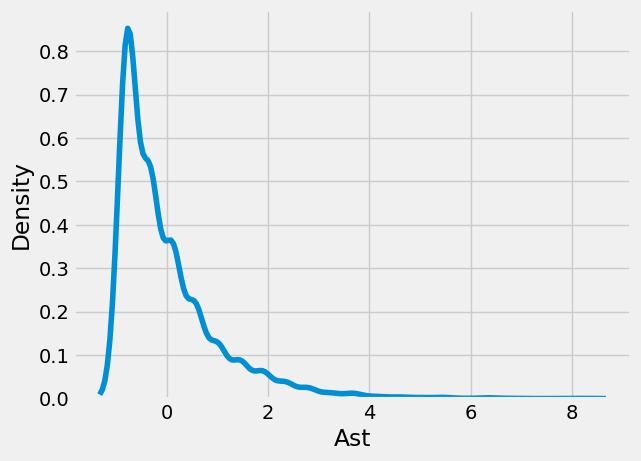

In [174]:
# Quick KDE cell:
sns.kdeplot(data=final_scaled_df, x='Ast')